# Apple Recognition

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
train_dir = 'train'
validation_dir = 'validation'


In [3]:
train_scab_dir = os.path.join(train_dir, 'Apple___Apple_scab')  
train_black_dir = os.path.join(train_dir, 'Apple___Black_rot')  
train_rust_dir = os.path.join(train_dir, 'Apple___Cedar_apple_rust')  
train_healthy_dir = os.path.join(train_dir, 'Apple___healthy')  

validation_scab_dir = os.path.join(validation_dir, 'Apple___Apple_scab')  
validation_black_dir = os.path.join(validation_dir, 'Apple___Black_rot')  
validation_rust_dir = os.path.join(validation_dir, 'Apple___Cedar_apple_rust')  
validation_healthy_dir = os.path.join(validation_dir, 'Apple___healthy')  



In [4]:
num_scab_tr = len(os.listdir(train_scab_dir))
num_black_tr = len(os.listdir(train_black_dir))
num_rust_tr = len(os.listdir(train_rust_dir))
num_healthy_tr = len(os.listdir(train_healthy_dir))

num_scab_val = len(os.listdir(validation_scab_dir))
num_black_val = len(os.listdir(validation_black_dir))
num_rust_val = len(os.listdir(validation_rust_dir))
num_healthy_val = len(os.listdir(validation_healthy_dir))


total_train = num_scab_tr + num_black_tr+num_rust_tr+num_healthy_tr
total_val = num_scab_val + num_black_val+num_rust_val+num_healthy_val


In [5]:

print("Total training images:", total_train)
print("Total validation images:", total_val)


Total training images: 10149
Total validation images: 2537


In [6]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 227
IMG_WIDTH = 227


In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data


In [8]:
training_set = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 10148 images belonging to 4 classes.


In [9]:
valid_set = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 2536 images belonging to 4 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout


classifier = Sequential()
#
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(227, 227, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

# Convolution Step 2
classifier.add(Convolution2D(256, 5, strides = (1, 1), padding='same', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu'))

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='same', activation = 'relu'))

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='same', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (3, 3), strides = (2, 2)))

# Flattening Step
classifier.add(Flatten())

# Full Connection Step 1
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.5))

# Full Connection Step 2
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.5))

# Classification step 
classifier.add(Dense(units = 4, activation = 'softmax'))

# Model summary
classifier.summary()

from keras import optimizers
classifier.compile(optimizer=optimizers.SGD(lr=1e-2, momentum=0.9, decay=5e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
            
            
# image preprocessing
from keras.preprocessing.image import ImageDataGenerator


train_num = training_set.samples
valid_num = valid_set.samples

from keras.callbacks import ModelCheckpoint
weightpath = "AlexNet_Weights.h5"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]


history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=epochs,
                         validation_steps=valid_num//batch_size,
                         callbacks=callback_list)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)      

C:\Users\snguyen4\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


79/79 [==============================] - 1366s 17s/step - loss: 1.1827 - accuracy: 0.5164 - val_loss: 1.0852 - val_accuracy: 0.5216
Epoch 3/50
79/79 [==============================] - 1331s 17s/step - loss: 1.0792 - accuracy: 0.5408 - val_loss: 1.0705 - val_accuracy: 0.6217
Epoch 4/50
79/79 [==============================] - 895s 11s/step - loss: 0.8516 - accuracy: 0.6357 - val_loss: 0.7501 - val_accuracy: 0.6578
Epoch 5/50
79/79 [==============================] - 598s 8s/step - loss: 0.7150 - accuracy: 0.7098 - val_loss: 0.8112 - val_accuracy: 0.6923
Epoch 6/50
79/79 [==============================] - 611s 8s/step - loss: 0.6469 - accuracy: 0.7333 - val_loss: 0.6364 - val_accuracy: 0.7903
Epoch 7/50
79/79 [==============================] - 614s 8s/step - loss: 0.5711 - accuracy: 0.7723 - val_loss: 0.4977 - val_accuracy: 0.8401
Epoch 8/50
79/79 [==============================] - 602s 8s/step - loss: 0.4189 - accuracy: 0.8405 - val_loss: 0.2675 - val_accuracy: 0.8879
Epoch 9/50
79/79 [=

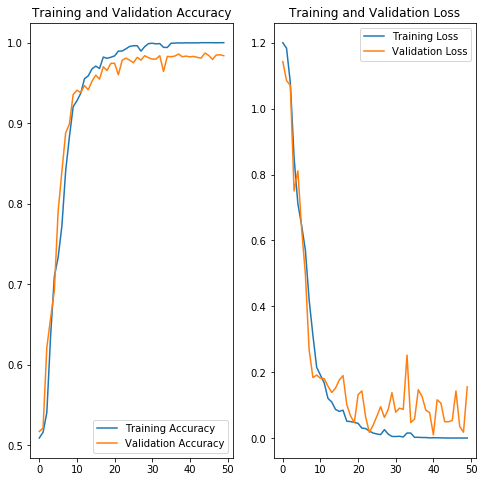

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [12]:
import tensorflow
tensorflow.__version__

'2.1.0'

In [13]:
import keras
keras.__version__

'2.3.1'